# Experiments

In this notebook is implemented the three experiments described in the paper.

## Header

Libraries and additional programs

In [147]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

pathh = '../Data/' 
#exp_file = 'ExperimentalResults_2.xlsx'  #Datos obtenidos con mis encuestas
#exp_file = 'ExperimentalResults_3.xlsx'   # Datos de MTURK-771
exp_file = '../Data/ExperimentalResults_4.xlsx'   # Q1 Modificado...

## Initializing memory and encoding dataset in HD space

In [3]:
%run EncodingDataset.ipynb
Init_mem()

End of memory initialization
Begining to encode dataset...
End of encoding


## Experiment 1

Given a concept it retrieves the "num_concepts" most similar concepts to it (for each different method). A comparison between methods is done by counting the number of coincidences between lists of concepts.

In [42]:
import random 

# List of all concepts in dataset
Concepts = get_concepts_list() 

# Test concepts
sample_size = 10
#Test_Concepts = random.sample(Concepts, sample_size)
Test_Concepts =  ['spoon', 'airplane', 'chair']
print Test_Concepts

num_concepts = 11
coincidence = []

for test_concept in Test_Concepts:
    print "\n\nConcept: ", test_concept
    # Asking closest concept of another concept's definition...
    HDC_sim = HDvector.getLabelSP(Dict[test_concept].getPointer())[:num_concepts]
    HDC_sim = NormalizeHammDist(HDC_sim)
    print "HDC_sim: ", HDC_sim
    
    DatSet_sim = ClosestConcepts(test_concept, num_concepts)
    print "DatSet_sim: ", DatSet_sim

    concept = wn.synset( get_synset(test_concept) )
    # Path similarity
    LC_sim = apply_sim_metric(wn.lch_similarity, num_concepts, concept ) 
    print "LC_sim: ", LC_sim
    WUP_sim = apply_sim_metric(wn.wup_similarity, num_concepts, concept )
    print "WUP_sim: ", WUP_sim
    
    # Information Content
    Res_sim = apply_sim_metric(wn.res_similarity, num_concepts, concept, brown_ic)
    print "Res_sim: ", Res_sim
    JC_sim = apply_sim_metric(wn.jcn_similarity, num_concepts, concept, brown_ic)
    print "JC_sim: ", JC_sim
    
    # Comparing lists agains HDC_sim for counting coincidence.
    # Creating name sets
    HDC_names = set([x[0] for x in HDC_sim])
    DatSet_names = set([x[0] for x in DatSet_sim])
    LC_names = set([x[0] for x in LC_sim])
    WUP_names = set([x[0] for x in WUP_sim])
    Res_names = set([x[0] for x in Res_sim])
    JC_names = set([x[0] for x in JC_sim])
    
    coincidence = coincidence + [[len(HDC_names.intersection(DatSet_names)), 
                                 len(HDC_names.intersection(LC_names)), 
                                 len(HDC_names.intersection(WUP_names)),    
                                 len(HDC_names.intersection(Res_names)), 
                                 len(HDC_names.intersection(JC_names))]]
    print coincidence

coincidence = np.array(coincidence)
# Measuring average against each method.
print "Average: ", np.mean(coincidence, axis = 0)

['spoon', 'airplane', 'chair']


Concept:  spoon
HDC_sim:  [['spoon', 1.0], ['ladle', 0.662], ['spatula', 0.625], ['fork', 0.616], ['colander', 0.61], ['tongs', 0.609], ['pot', 0.588], ['bucket', 0.584], ['bowl', 0.582], ['grater', 0.582], ['peg', 0.582]]
DatSet_sim:  [['spoon', 1.0], ['fork', 0.546], ['ladle', 0.411], ['spatula', 0.395], ['tongs', 0.35], ['colander', 0.336], ['bowl', 0.292], ['strainer', 0.282], ['dish', 0.282], ['peg', 0.28], ['grater', 0.259]]
LC_sim:  [['spoon', 3.638], ['bag', 2.539], ['basket', 2.539], ['bin_(waste)', 2.539], ['box', 2.539], ['cup', 2.539], ['dish', 2.539], ['envelope', 2.539], ['fork', 2.539], ['thimble', 2.539], ['ashtray', 2.251]]
WUP_sim:  [['fork', 0.9], ['spoon', 0.9], ['bag', 0.875], ['basket', 0.875], ['bin_(waste)', 0.875], ['box', 0.875], ['envelope', 0.875], ['thimble', 0.875], ['ashtray', 0.824], ['barrel', 0.824], ['bathtub', 0.824]]
Res_sim:  [['spoon', 11.208], ['fork', 10.574], ['cup', 7.49], ['dish', 7.49], ['plate', 7.49], ['sau

## Experiment 2

### a) Human-judged similarity

[['spoon', 'barrel'], ['spoon', 'truck'], ['shoes', 'bike'], ['spoon', 'envelope'], ['chair', 'pen'], ['shoes', 'shield'], ['shoes', 'whip'], ['spoon', 'box'], ['chair', 'book'], ['table', 'brush'], ['spoon', 'basket'], ['table', 'curtains'], ['spoon', 'ashtray'], ['chair', 'car'], ['table', 'barrel'], ['carpet', 'scarf'], ['bed', 'lamp'], ['shoes', 'carpet'], ['table', 'knife'], ['table', 'lamp'], ['bed', 'mink_(coat)'], ['shoes', 'earmuffs'], ['table', 'spoon'], ['shoes', 'skirt'], ['chair', 'closet'], ['shoes', 'mink_(coat)'], ['bed', 'curtains'], ['chair', 'bookcase'], ['bowl', 'bathtub'], ['chair', 'dresser'], ['table', 'bookcase'], ['bed', 'closet'], ['spoon', 'colander'], ['bed', 'chair'], ['bed', 'dresser'], ['shoes', 'belt'], ['bed', 'table'], ['boots', 'belt'], ['table', 'sofa'], ['pen', 'envelope'], ['bed', 'pajamas'], ['shovel', 'machete'], ['table', 'bench'], ['stove', 'pot'], ['bed', 'cushion'], ['bed', 'sofa'], ['spoon', 'tongs'], ['table', 'chair'], ['spoon', 'spatula']

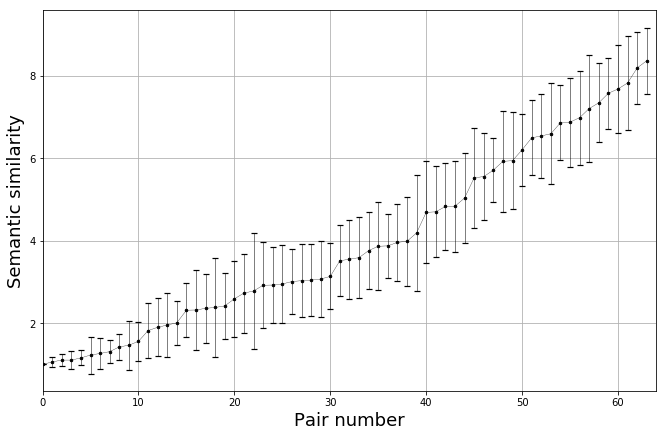

In [156]:
def ListofPairs (number):
    "It obtains a list of pairs of concepts"
    df = pd.read_excel(exp_file)
    if number > 0:
        string = 'Q' + str(number)    
    else:
        string = 'average'
    # 1) List of concepts
    ordered = df.sort_values(by=string)
    c1 = map(str, list( ordered['concept 1'] ))
    c2 = map(str, list( ordered['concept 2'] ))
    L1 = map(list, zip(c1,c2))
    
    # 2) Human similarity and stdev
    ordered = df.sort_values(by=string)
    L2 = list(ordered[string])
    L3 = list(ordered['stdev'])
    return L1, L2, L3

PConcepts, Hum_Sim, stdev = ListofPairs(0)
print PConcepts, Hum_Sim, stdev
# Plotting
#plt.plot(Hum_Sim)
# stdev bars
x = np.array(range(64))
stdev = np.array(map(lambda x: x*0.5, stdev))

plt.rcParams["figure.figsize"] = [11,7]

line,caps,bars = plt.errorbar(x, Hum_Sim, stdev,       
                    fmt="k-",
                    #linestyle='None',
                    marker='.',
                    markersize=5,
                    linewidth=0.3,
                    elinewidth=0.5,
                    ecolor='k',
                    capsize=3,
                    capthick=1.2)

# plt.setp(bars,label="Std dev")
# plt.legend(loc=('upper left'), prop={'size': 15})
plt.xlim((0,64))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim.png', dpi=300)
#plt.errorbar(x, Hum_Sim, stdev, linestyle='None', marker='.')